In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os.path as op
import glob
import matplotlib.pyplot as plt
import ast
import csv
import random
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import scipy
from statsmodels.formula.api import mixedlm
from statsmodels.stats.anova import AnovaRM
from sklearn.preprocessing import StandardScaler
from matplotlib.cm import get_cmap
# from plot_utils import combined_rolling_average_and_model_fit, combined_sliding_window_and_model_fit_split_col
from common_functions import remove_unit_variance
import ptitprince as pt


In [2]:
# !pip install seaborn==0.10
# !pip install ptitprince

In [3]:

df = pd.read_csv('df_ltm_testing.csv')
df_correct =  pd.read_csv('pilot_total_stats/correct_wm_ltm.csv')
df_distractor =  pd.read_csv('pilot_total_stats/distractor_wm_ltm.csv')
df_incorrect = pd.read_csv('pilot_total_stats/incorrect_wm_ltm.csv')





    
df['LTM Accuracy'] = df['recall_answ']
df['Categories'] = df['category']


df_correct_ltm = df[
    ((df['recall_answ'] == 1))
]

#df_correct_ltm = remove_unit_variance(df_correct_ltm,'recall_answ','participant')
df_correct_ltm['LTM Accuracy'] = df_correct_ltm['recall_answ']
#df_correct_ltm =  remove_unit_variance(df_correct_ltm,'image_recall_response.rt','participant')
df_correct_ltm['analysis_rt'] = df_correct_ltm['image_recall_response.rt']


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_1827/3026704039.py:1: DtypeWarning: Columns (156) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_ltm_testing.csv')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_1827/3026704039.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct_ltm['LTM Accuracy'] = df_correct_ltm['recall_answ']
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_1827/3026704039.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [4]:
df['category']

0            tested
1              foil
2        not tested
3              foil
4              foil
            ...    
62038          foil
62039          foil
62040    distractor
62041        tested
62042        tested
Name: category, Length: 62043, dtype: object

In [5]:
df['Reliability']

0         low
1        foil
2         low
3        foil
4        foil
         ... 
62038    foil
62039    foil
62040     low
62041    high
62042    high
Name: Reliability, Length: 62043, dtype: object

In [6]:
df['Attend']

0        not attended
1                foil
2        not attended
3                foil
4                foil
             ...     
62038            foil
62039            foil
62040      distractor
62041    not attended
62042    not attended
Name: Attend, Length: 62043, dtype: object

In [7]:
df['Tested']

0            tested
1              foil
2        not tested
3              foil
4              foil
            ...    
62038          foil
62039          foil
62040    distractor
62041        tested
62042        tested
Name: Tested, Length: 62043, dtype: object

In [8]:
#dbad40

In [9]:

grey = '#BFBFBF'
blue = '#6cbcef'
teal = '#49a791'
purple = '#a271b1'
salmon = '#e58a72'
gold = '#dbad40'
green = '#95c355'

In [10]:


avg_scores = df.groupby(['Categories','participant'])['LTM Accuracy'].mean().reset_index()
avg_scores_table = df.groupby(['participant', 'Tested', 'Categories'])['LTM Accuracy'].mean().reset_index()
# avg_scores_table = avg_scores_table.rename(columns={'resp_correct': 'Average Score'})
# avg_scores_table = avg_scores_table.rename(columns={'validity_reliability': 'Validity Reliability Group'})
avg_scores_table_rt = df_correct_ltm.groupby(['participant', 'Tested', 'Categories'])['analysis_rt'].mean().reset_index()
avg_scores_table_rt = avg_scores_table_rt.rename(columns={'analysis_rt': 'LTM RT'})




In [11]:
sns.set_context('notebook')

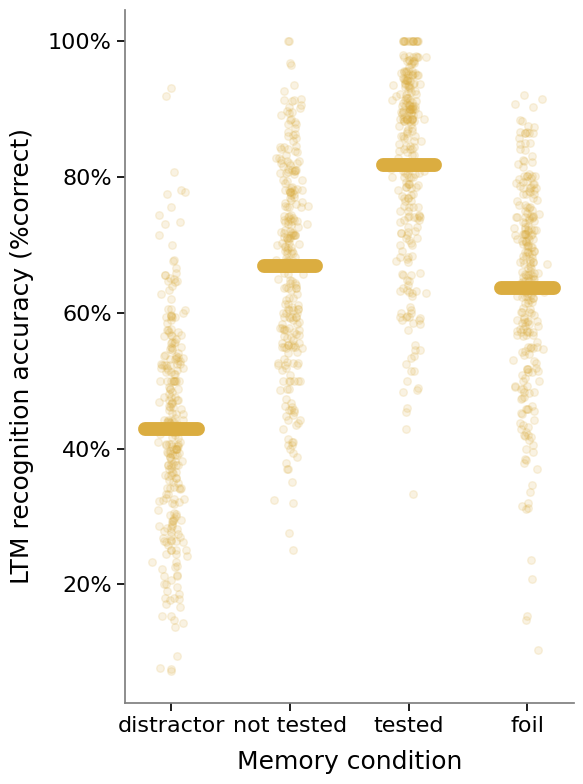

In [12]:
f, ax = plt.subplots(figsize=(6, 8))  # Further shortened width from 8 to 6
dx = 'Categories'
dy = 'LTM Accuracy'  # Updated informative label
# Set specific order for x-axis
desired_order = ['distractor', 'not tested', 'tested', 'foil']
unique_x = desired_order
# Define gold color for all categories
gold_color = '#dbad40'  # Your specified gold
colors = [gold_color] * len(unique_x)  # All categories get the same gold color
# Further reduced spacing between categories for closer positioning
category_spacing = 1.0  # Reduced from 1.5 to bring conditions even closer
for i, x_val in enumerate(unique_x):
    # Filter data for this category
    subset = avg_scores_table[avg_scores_table[dx] == x_val]
    
    if len(subset) > 0:
        # Calculate x position
        x_pos = i * category_spacing
        
        # Add even more transparent individual points with jitter
        x_jitter = np.random.normal(x_pos, 0.05, len(subset))
        ax.scatter(x_jitter, subset[dy] * 100,  # Convert to percentage
                  color=colors[i], alpha=0.15, s=30, zorder=1)  # Further reduced alpha from 0.2 to 0.15
        
        # Calculate and plot wider mean line
        mean_value = subset[dy].mean() * 100  # Convert to percentage
        line_width = 0.22  # Increased from 0.18 for slightly wider bars
        ax.plot([x_pos - line_width, x_pos + line_width], [mean_value, mean_value], 
               color=colors[i], linewidth=10, solid_capstyle='round', zorder=10)

# Clean up axes and labels with appropriate fonts for smaller plot
ax.set_xticks([i * category_spacing for i in range(len(unique_x))])
ax.set_xticklabels(unique_x, fontsize=16)  # Slightly reduced from 18 for better fit
ax.set_xlabel('Memory condition', fontsize=18, labelpad=10)  # Slightly reduced from 20
ax.set_ylabel(dy, fontsize=18, labelpad=10)  # Slightly reduced from 20

# Format y-axis as percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
ax.tick_params(axis='y', labelsize=16)  # Adjusted y-tick labels

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Set remaining spines to grey
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')

ax.set_ylabel('LTM recognition accuracy (%correct)', fontsize=18, labelpad=10)

# No title (removed as requested)
plt.tight_layout()
plt.show()

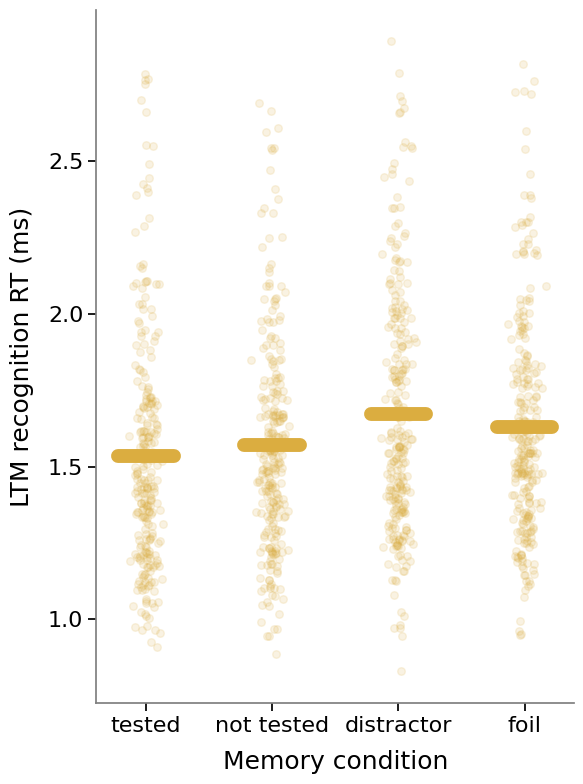

In [13]:
f, ax = plt.subplots(figsize=(6, 8))  # Further shortened width from 8 to 6
dx = 'Categories'
dy = 'LTM RT'  # Updated informative label
# Set specific order for x-axis
desired_order = ['tested', 'not tested', 'distractor', 'foil']
unique_x = desired_order
# Define gold color for all categories
gold_color = '#dbad40'  # Your specified gold
colors = [gold_color] * len(unique_x)  # All categories get the same gold color
# Further reduced spacing between categories for closer positioning
category_spacing = 1.0  # Reduced from 1.5 to bring conditions even closer
for i, x_val in enumerate(unique_x):
    # Filter data for this category
    subset = avg_scores_table_rt[avg_scores_table_rt[dx] == x_val]
    
    if len(subset) > 0:
        # Calculate x position
        x_pos = i * category_spacing
        
        # Add even more transparent individual points with jitter
        x_jitter = np.random.normal(x_pos, 0.05, len(subset))
        ax.scatter(x_jitter, subset['LTM RT'],  # Use original RT column name
                  color=colors[i], alpha=0.15, s=30, zorder=1)  # Further reduced alpha from 0.2 to 0.15
        
        # Calculate and plot wider mean line
        mean_value = subset['LTM RT'].mean()  # Use original RT column name
        line_width = 0.22  # Increased from 0.18 for slightly wider bars
        ax.plot([x_pos - line_width, x_pos + line_width], [mean_value, mean_value], 
               color=colors[i], linewidth=10, solid_capstyle='round', zorder=10)

# Clean up axes and labels with appropriate fonts for smaller plot
ax.set_xticks([i * category_spacing for i in range(len(unique_x))])
ax.set_xticklabels(unique_x, fontsize=16)  # Slightly reduced from 18 for better fit
ax.set_xlabel('Memory condition', fontsize=18, labelpad=10)  # Slightly reduced from 20
ax.set_ylabel(dy, fontsize=18, labelpad=10)  # Slightly reduced from 20

# Format y-axis for reaction time (milliseconds)
ax.tick_params(axis='y', labelsize=16)  # Adjusted y-tick labels

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Set remaining spines to grey
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')

ax.set_ylabel('LTM recognition RT (ms)', fontsize=18, labelpad=10)

# No title (removed as requested)
plt.tight_layout()
plt.show()

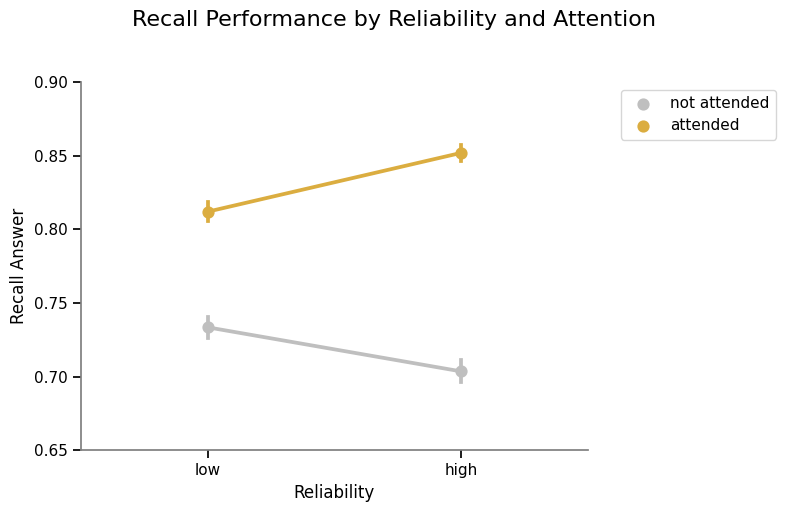

In [14]:
x_label = 'Reliability'  # Change this to customize x-axis label
y_label = 'Recall Answer'  # Change this to customize y-axis label
plot_title = 'Recall Performance by Reliability and Attention'  # Change this to customize title
custom_palette = {'attended': gold, 'not attended': grey}

g = sns.catplot(
    x='Reliability',
    y='recall_answ',
    ci=68,
    # row='Tested',
    # row_order=['not tested', 'tested'],
    hue='Attend',        
    aspect=1.3,
    # dodge=0.1,
    kind='point',
    palette=custom_palette,  # Use custom gold/grey palette
    data=df_correct
)

g.set(ylim=(0.65, 0.9))

# Customize axis labels
g.set_axis_labels(x_label, y_label)
g.fig.suptitle(plot_title, fontsize=16, y=1.02)

for ax in g.axes.flat:
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    ax.spines['top'].set_color('grey')
    ax.spines['right'].set_color('grey')

# Move legend outside the plot
# First, get handles and labels from the plot
ax = g.axes.flat[0]
handles, labels = ax.get_legend_handles_labels()

# Remove the original legend from the figure
if g._legend is not None:
    g._legend.remove()

# Add new legend outside the plot
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

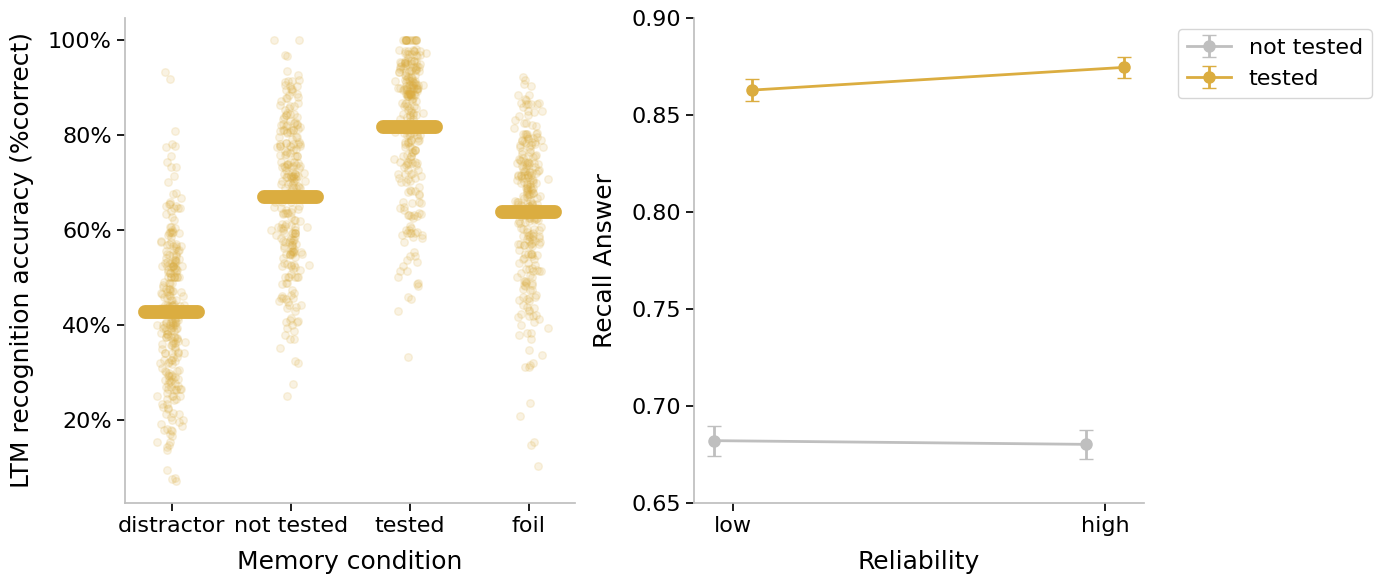

In [15]:

FONT_SIZE_TICKS = 16
FONT_SIZE_LABELS = 18
GOLD_COLOR = gold
GREY_COLOR = grey

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# ============ LEFT PLOT (LTM Accuracy) ============
dx = 'Categories'
dy = 'LTM Accuracy'
desired_order = ['distractor', 'not tested', 'tested', 'foil']
unique_x = desired_order
gold_color = GOLD_COLOR
colors = [gold_color] * len(unique_x)
category_spacing = 1.0

for i, x_val in enumerate(unique_x):
    # Filter data for this category
    subset = avg_scores_table[avg_scores_table[dx] == x_val]
    
    if len(subset) > 0:
        # Calculate x position
        x_pos = i * category_spacing
        
        # Add transparent individual points with jitter
        x_jitter = np.random.normal(x_pos, 0.05, len(subset))
        ax1.scatter(x_jitter, subset[dy] * 100,
                   color=colors[i], alpha=0.15, s=30, zorder=1)
        
        # Calculate and plot mean line
        mean_value = subset[dy].mean() * 100
        line_width = 0.22
        ax1.plot([x_pos - line_width, x_pos + line_width], [mean_value, mean_value], 
                color=colors[i], linewidth=10, solid_capstyle='round', zorder=10)

# Style left plot
ax1.set_xticks([i * category_spacing for i in range(len(unique_x))])
ax1.set_xticklabels(unique_x, fontsize=FONT_SIZE_TICKS)
ax1.set_xlabel('Memory condition', fontsize=FONT_SIZE_LABELS, labelpad=10)
ax1.set_ylabel('LTM recognition accuracy (%correct)', fontsize=FONT_SIZE_LABELS, labelpad=10)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
ax1.tick_params(axis='y', labelsize=FONT_SIZE_TICKS)

# Remove top and right spines, set others to grey
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color(GREY_COLOR)
ax1.spines['bottom'].set_color(GREY_COLOR)

# ============ RIGHT PLOT (Recall Performance) ============
# Define custom palette
custom_palette = {'tested': GOLD_COLOR, 'not tested': GREY_COLOR}

# Create the point plot manually for better control
reliability_order = df_correct['Reliability'].unique()
tested_conditions = ['not tested', 'tested']

for i, condition in enumerate(tested_conditions):
    condition_data = df_correct[df_correct['Tested'] == condition]
    
    # Calculate means and confidence intervals for each reliability level
    means = []
    cis = []
    x_positions = []
    
    for j, reliability in enumerate(reliability_order):
        rel_data = condition_data[condition_data['Reliability'] == reliability]['recall_answ']
        if len(rel_data) > 0:
            mean_val = rel_data.mean()
            # Calculate 68% confidence interval (1 SEM)
            sem = rel_data.sem()
            ci = sem * 1.0  # 68% CI ≈ 1 SEM
            
            means.append(mean_val)
            cis.append(ci)
            # Offset x positions slightly for dodge effect
            x_positions.append(j + (i - 0.5) * 0.1)
    
    # Plot points and lines
    color = custom_palette[condition]
    ax2.errorbar(x_positions, means, yerr=cis, 
                marker='o', color=color, label=condition,
                linewidth=2, markersize=8, capsize=5)

# Style right plot
ax2.set_xticks(range(len(reliability_order)))
ax2.set_xticklabels(reliability_order, fontsize=FONT_SIZE_TICKS)
ax2.set_xlabel('Reliability', fontsize=FONT_SIZE_LABELS, labelpad=10)
ax2.set_ylabel('Recall Answer', fontsize=FONT_SIZE_LABELS, labelpad=10)
ax2.tick_params(axis='y', labelsize=FONT_SIZE_TICKS)
ax2.set_ylim(0.65, 0.9)

# Style spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color(GREY_COLOR)
ax2.spines['bottom'].set_color(GREY_COLOR)

# Add legend outside the plot
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=FONT_SIZE_TICKS)

# Adjust layout
plt.tight_layout()
plt.show()

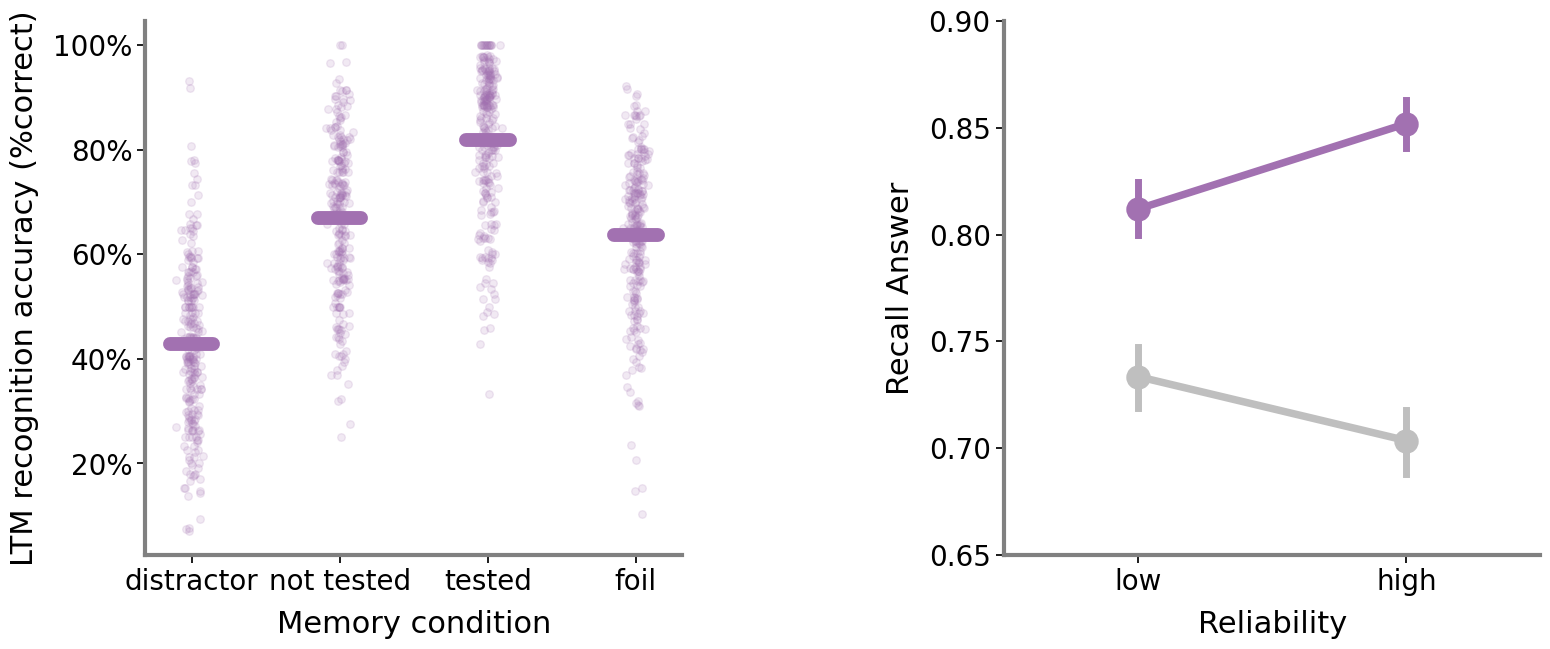

In [16]:
fontsize_labels = 22  
fontsize_ticks = 20   
fontsize_title = 16
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 1]})

dx = 'Categories'
dy = 'LTM Accuracy'
desired_order = ['distractor', 'not tested', 'tested', 'foil']
unique_x = desired_order
colors = [purple] * len(unique_x)
category_spacing = 1.5
for i, x_val in enumerate(unique_x):
    subset = avg_scores_table[avg_scores_table[dx] == x_val]
    
    if len(subset) > 0:
        x_pos = i * category_spacing
        
        x_jitter = np.random.normal(x_pos, 0.05, len(subset))
        ax1.scatter(x_jitter, subset[dy] * 100,  
                   color=colors[i], alpha=0.15, s=30, zorder=1)
        
        mean_value = subset[dy].mean() * 100  
        line_width = 0.22
        ax1.plot([x_pos - line_width, x_pos + line_width], [mean_value, mean_value], 
                color=colors[i], linewidth=10, solid_capstyle='round', zorder=10)

ax1.set_xticks([i * category_spacing for i in range(len(unique_x))])
ax1.set_xticklabels(unique_x, fontsize=fontsize_ticks)
ax1.set_xlabel('Memory condition', fontsize=fontsize_labels, labelpad=10)
ax1.set_ylabel('LTM recognition accuracy (%correct)', fontsize=fontsize_labels, labelpad=10)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
ax1.tick_params(axis='y', labelsize=fontsize_ticks)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('grey')
ax1.spines['bottom'].set_color('grey')
ax1.spines['left'].set_linewidth(3)    
ax1.spines['bottom'].set_linewidth(3)  

custom_palette = {'attended': purple, 'not attended': grey}

sns.pointplot(
    x='Reliability',  
    y='recall_answ',  
    hue='Attend',     
    ci=95,
    data=df_correct,  
    scale=2,
    ax=ax2,
    palette=custom_palette,
    errwidth=5,
    legend=False
)

ax2.set_xlabel('Reliability', fontsize=fontsize_labels, labelpad=10)
ax2.set_ylabel('Recall Answer', fontsize=fontsize_labels, labelpad=10)
ax2.tick_params(axis='both', labelsize=fontsize_ticks)
ax2.set_ylim(0.65, 0.9)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('grey')
ax2.spines['bottom'].set_color('grey')
ax2.spines['left'].set_linewidth(3)    
ax2.spines['bottom'].set_linewidth(3) 
ax2.legend().remove()

plt.subplots_adjust(wspace=0.6,top=1) 
plt.show()

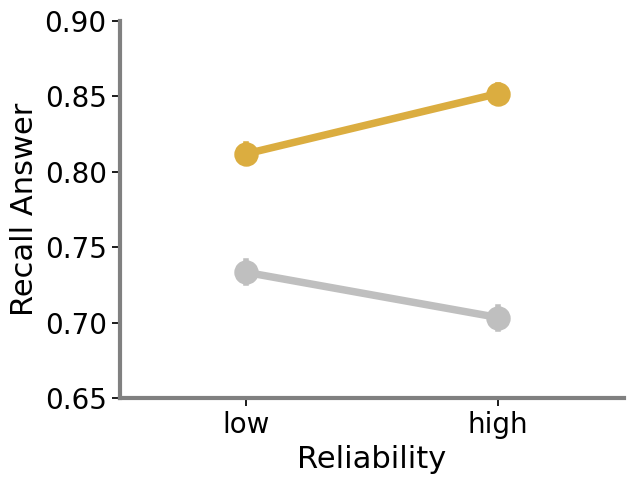

In [17]:
# x_label = 'Reliability'
y_label = 'Recall Answer'
plot_title = 'Recall Performance by Reliability and Attention'
custom_palette = {'attended': gold, 'not attended': grey}

g = sns.catplot(
    x='Reliability',
    y='recall_answ',
    ci=68,
    hue='Attend',        
    aspect=1.3,
    kind='point',
    palette=custom_palette,
    data=df_correct,
    scale=2,           # Larger points to match previous style
    errwidth=4,        # Thicker error bars
    legend=False       # Remove legend to match previous style
)

g.set(ylim=(0.65, 0.9))

# Customize axis labels with larger font sizes
g.set_axis_labels(x_label, y_label)

# Style each axis to match the previous plots
for ax in g.axes.flat:
    # Set larger font sizes to match previous style
    ax.set_xlabel(x_label, fontsize=22)
    ax.set_ylabel(y_label, fontsize=22)
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    # Hide top and right spines, keep only bottom and left
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    
    # Make axis lines thicker
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)


plt.tight_layout()
plt.show()

In [20]:
def create_purple_gradient(base_color='#a271b1', n_colors=4):
    import matplotlib.colors as mcolors
    
    r, g, b = mcolors.hex2color(base_color)
    colors = []
    for i in range(n_colors):
        
        factor = 1.3 - (i * 0.3)  # 1.3, 1.0, 0.7, 0.4
        
        if factor > 1.0:
            blend = factor - 1.0
            new_r = min(1.0, r + blend * (1 - r))
            new_g = min(1.0, g + blend * (1 - g))
            new_b = min(1.0, b + blend * (1 - b))
        else:
            new_r = r * factor
            new_g = g * factor
            new_b = b * factor
        
        colors.append((new_r, new_g, new_b))
    
    return colors
desired_order = ['distractor', 'untested', 'tested', 'novel']
gradient_colors = create_purple_gradient('#a271b1', 4)
custom_palette = dict(zip(desired_order, gradient_colors))

In [24]:
df['Categories'] = df['Categories'].replace({
    'foil': 'novel',
    'not tested': 'untested'
})


fontsize_labels = 22  
fontsize_ticks = 20   
fontsize_title = 16

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4), gridspec_kw={'width_ratios': [1, 1]})

dx = 'Categories'
dy = 'LTM Accuracy'
desired_order = ['distractor', 'untested', 'tested', 'novel']
gradient_colors = create_purple_gradient('#a271b1', 4)
custom_palette = dict(zip(desired_order, gradient_colors))

sns.pointplot(
    x='Categories',  
    y='recall_answ',
    order = desired_order,
    ci=95,
    data=df,  
    scale=2,
    errwidth=4, 
    ax=ax1,
    palette= custom_palette,
    linestyles = '',
    legend=False  
)

ax1.set_xlabel('', fontsize=fontsize_labels, labelpad=10)
ax1.set_ylabel('Recognition Accuracy (% Correct)', fontsize=fontsize_labels, labelpad=10)
ax1.tick_params(axis='x', labelsize=fontsize_ticks, rotation=45)
ax1.tick_params(axis='y', labelsize=fontsize_ticks)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('grey')
ax1.spines['bottom'].set_color('grey')
ax1.spines['left'].set_linewidth(3)    
ax1.spines['bottom'].set_linewidth(3)

ax1.set_ylim(0.2, 1)

ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1.0, decimals=0))

custom_palette = {'attended': purple, 'not attended': grey}

sns.pointplot(
    x='Reliability',  
    y='recall_answ',  
    hue='Attend',     
    ci=95,
    data=df_correct,  
    scale=2,
    ax=ax2,
    palette=custom_palette,
    errwidth=4,  
    legend=False  
)

ax2.set_xlabel('Reliability', fontsize=fontsize_labels, labelpad=10)
ax2.set_ylabel('Recognition Accuracy (% Correct)', fontsize=fontsize_labels, labelpad=10)
ax2.tick_params(axis='both', labelsize=fontsize_ticks)
#ax2.set_ylim(0.65, 0.9)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('grey')
ax2.spines['bottom'].set_color('grey')
ax2.spines['left'].set_linewidth(3)    
ax2.spines['bottom'].set_linewidth(3)

ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1.0, decimals=0))
ax2.legend().remove()

plt.subplots_adjust(wspace=0.6, right=0.85, top)
plt.show()

SyntaxError: positional argument follows keyword argument (2953665646.py, line 77)

NameError: name 'df_plot1' is not defined

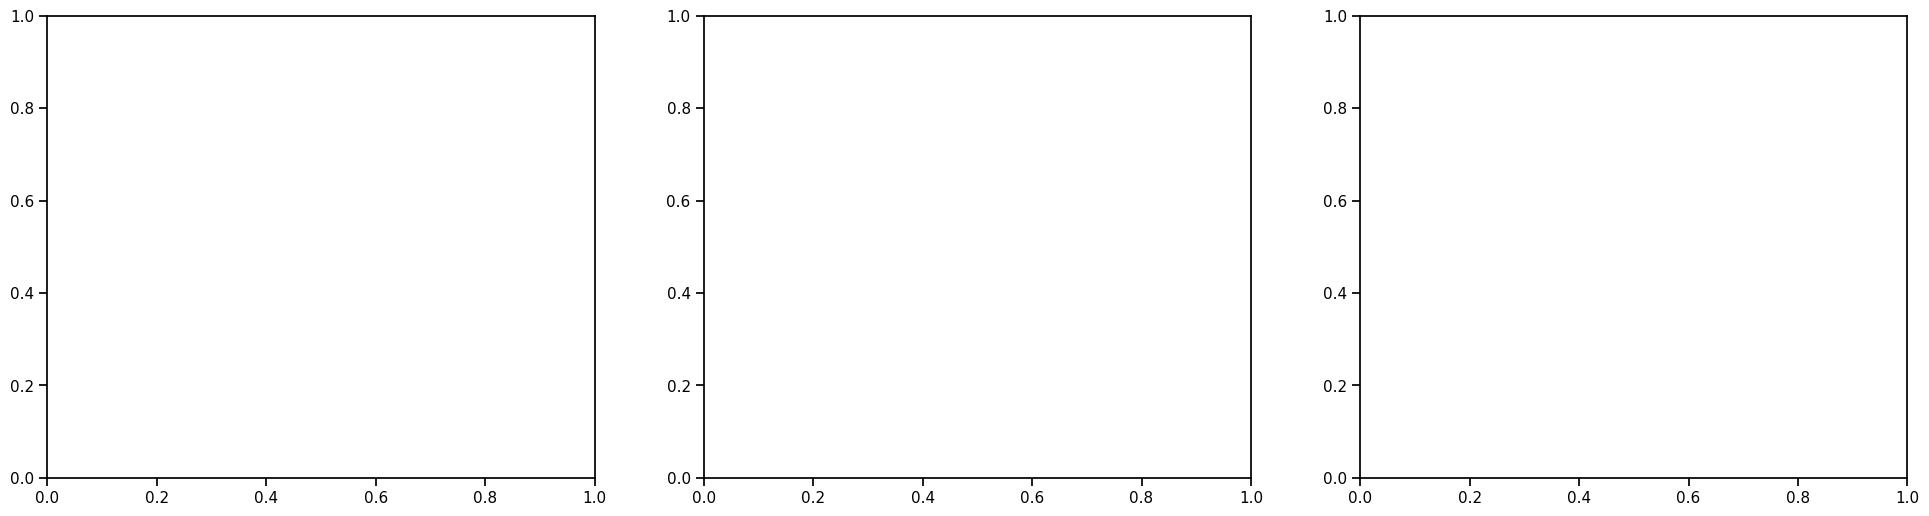

In [25]:
from matplotlib.ticker import MultipleLocator

fig, axes = plt.subplots(1, 3, figsize=(24, 6))

desired_order = ['distractor', 'untested', 'tested', 'novel']
gradient_colors = create_purple_gradient('#a271b1', 4)
custom_palette = dict(zip(desired_order, gradient_colors))

sns.pointplot(
    x='Categories',
    y='recall_answ',
    order = desired_order,
    ci=95,
    data=df_plot1,
    ax=axes[0],
    palette=custom_palette,
    scale=2,
    errwidth=4,
    legend=False
)
axes[0].tick_params(axis='x',  which='major',  rotation=25, labelsize=20)
axes[0].tick_params(axis='y', which='major',  labelsize=20)
axes[0].set_ylabel('Recognition Accuracy (% Correct)', fontsize=22, labelpad=10)
axes[0].set_xlabel('', fontsize=22)
axes[0].yaxis.set_major_locator(MultipleLocator(0.2))
axes[0].set_ylim(0.2, 1)
current_labels = [f"{float(tick):.2f}" for tick in axes[0].get_yticks()]
axes[0].spines['bottom'].set_color('grey')
axes[0].spines['left'].set_color('grey')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].legend().set_visible(False) if axes[0].get_legend() else None
custom_palette = {'attended': purple, 'not attended': grey}
axes[0].yaxis.set_major_formatter(mticker.PercentFormatter(1.0, decimals=0))

sns.pointplot(
    x='Reliability',
    y='recall_answ',
    hue='Attend',
    ci=95,
    data=df_correct,
    ax=axes[1],
    palette=custom_palette,
    linewidth=2,
    scale=2,
    errwidth=4,
    legend=False
)
axes[1].set_ylabel('Recognition Accuracy (% Correct)', fontsize=22, labelpad=10)
axes[1].set_xlabel('Reliability', fontsize=22)
axes[1].tick_params(axis='both', which='major', labelsize=20)
axes[1].set_ylim(0.65, 0.9)
axes[1].yaxis.set_major_formatter(mticker.PercentFormatter(1.0, decimals=0))
axes[1].spines['bottom'].set_color('grey')
axes[1].spines['left'].set_color('grey')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].legend().set_visible(False) if axes[1].get_legend() else None

# df_plot3 = df_cleaned.copy()
# sns.pointplot(
#     x='Reliability',
#     y='Average Error Score',
#     hue='Tested Item',
#     ci=95,
#     data=df_plot3,
#     scale=2,
#     ax=axes[2],
#     palette=colors,
#     errwidth=5,
#     legend=False
# )
# axes[2].set_ylabel('Within-Category Errors (%)', fontsize=22)
# axes[2].set_xlabel('Retrocue Reliability', fontsize=22)
# axes[2].tick_params(axis='both', which='major', labelsize=20)
# axes[2].set_ylim(44, 68)
# axes[2].set_yticks(np.arange(44, 69, 4))
# current_labels = [label.get_text() for label in axes[2].get_yticklabels()]
# axes[2].set_yticklabels([f'{label}%' for label in current_labels])
# axes[2].spines['bottom'].set_color('grey')
# axes[2].spines['left'].set_color('grey')
# axes[2].spines['top'].set_visible(False)
# axes[2].spines['right'].set_visible(False)
# axes[2].legend().set_visible(False) if axes[2].get_legend() else None

# Make axis lines thicker for all plots
for ax in axes:
    ax.spines['bottom'].set_linewidth(3)  
    ax.spines['left'].set_linewidth(3)   

handles, labels = axes[0].get_legend_handles_labels()
plt.subplots_adjust(wspace=0.6, right=0.85)
plt.show()

NameError: name 'df_plot1' is not defined

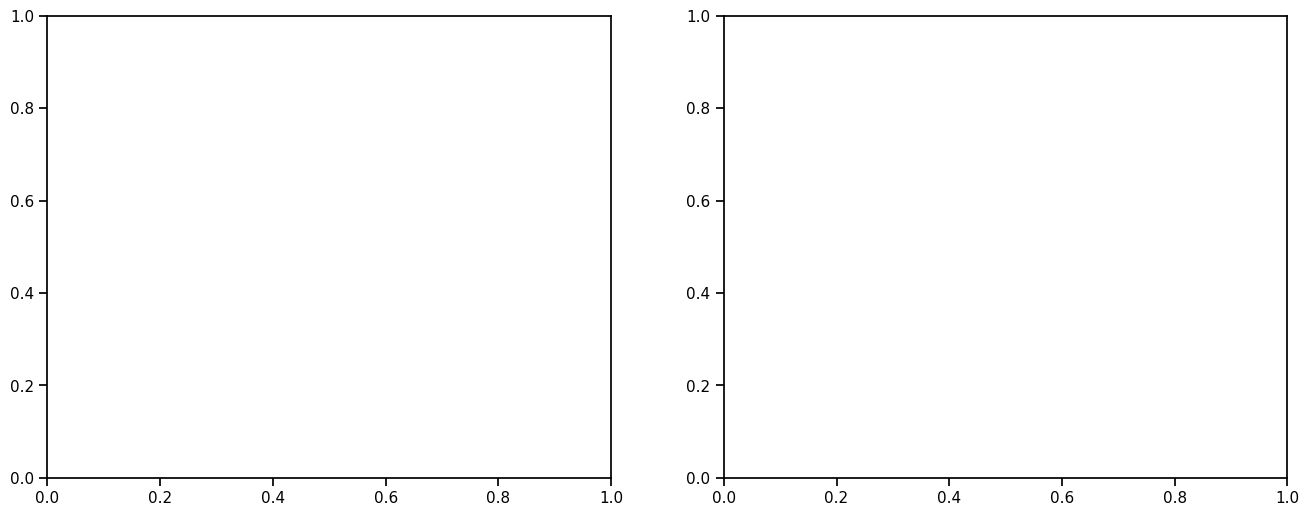

In [26]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  

desired_order = ['distractor', 'untested', 'tested', 'novel']
gradient_colors = create_purple_gradient('#a271b1', 4)
custom_palette = dict(zip(desired_order, gradient_colors))

sns.pointplot(
    x='Categories',
    y='recall_answ',
    order = desired_order,
    ci=95,
    data=df_plot1,
    ax=axes[0],
    palette=custom_palette,
    scale=2,
    errwidth=4,
    legend=False
)
axes[0].tick_params(axis='x',  which='major',  rotation=25, labelsize=20)
axes[0].tick_params(axis='y', which='major',  labelsize=20)
axes[0].set_ylabel('Recognition Accuracy (% Correct)', fontsize=22, labelpad=10)
axes[0].set_xlabel('', fontsize=22)
axes[0].set_ylim(0.2, 1)

axes[0].yaxis.set_major_locator(MultipleLocator(0.2))

axes[0].spines['bottom'].set_color('grey')
axes[0].spines['left'].set_color('grey')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].legend().set_visible(False) if axes[0].get_legend() else None
custom_palette = {'attended': purple, 'not attended': grey}
axes[0].yaxis.set_major_formatter(mticker.PercentFormatter(1.0, decimals=0))

sns.pointplot(
    x='Reliability',
    y='recall_answ',
    hue='Attend',
    ci=95,
    data=df_correct,
    ax=axes[1],
    palette=custom_palette,
    linewidth=2,
    scale=2,
    errwidth=4,
    legend=False
)
axes[1].set_ylabel('Recognition Accuracy (% Correct)', fontsize=22, labelpad=10)
axes[1].set_xlabel('Reliability', fontsize=22)
axes[1].tick_params(axis='both', which='major', labelsize=20)
axes[1].set_ylim(0.65, 0.9)
axes[1].yaxis.set_major_formatter(mticker.PercentFormatter(1.0, decimals=0))
axes[1].spines['bottom'].set_color('grey')
axes[1].spines['left'].set_color('grey')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].legend().set_visible(False) if axes[1].get_legend() else None

for ax in axes:
    ax.spines['bottom'].set_linewidth(3)  
    ax.spines['left'].set_linewidth(3)   

plt.subplots_adjust(wspace=0.6, right=0.85)  # Keep same spacing proportions
plt.show()

In [27]:

df_correct_wm_ltm = df_correct[
    ((df_correct['recall_answ'] == 1))
]

df_correct_wm_ltm = remove_unit_variance(df_correct_wm_ltm,'recall_answ','participant')
df_correct_wm_ltm['LTM Accuracy'] = df_correct_wm_ltm['recall_answ_within']
df_correct_wm_ltm =  remove_unit_variance(df_correct_wm_ltm,'image_recall_response.rt','participant')
df_correct_wm_ltm['analysis_rt'] = df_correct_wm_ltm['image_recall_response.rt_within']


avg_scores_wmltm = df_correct.groupby(['Reliability','participant'])['LTM Accuracy'].mean().reset_index()
avg_scores_table_wmltm = df_correct.groupby(['participant', 'Attend', 'Reliability'])['LTM Accuracy'].mean().reset_index()
avg_scores_table_rt_wmltm = df_correct_wm_ltm.groupby(['participant', 'Attend', 'Reliability'])['analysis_rt'].mean().reset_index()
avg_scores_table_rt_wmltm = avg_scores_table_rt_wmltm.rename(columns={'analysis_rt': 'LTM RT'})



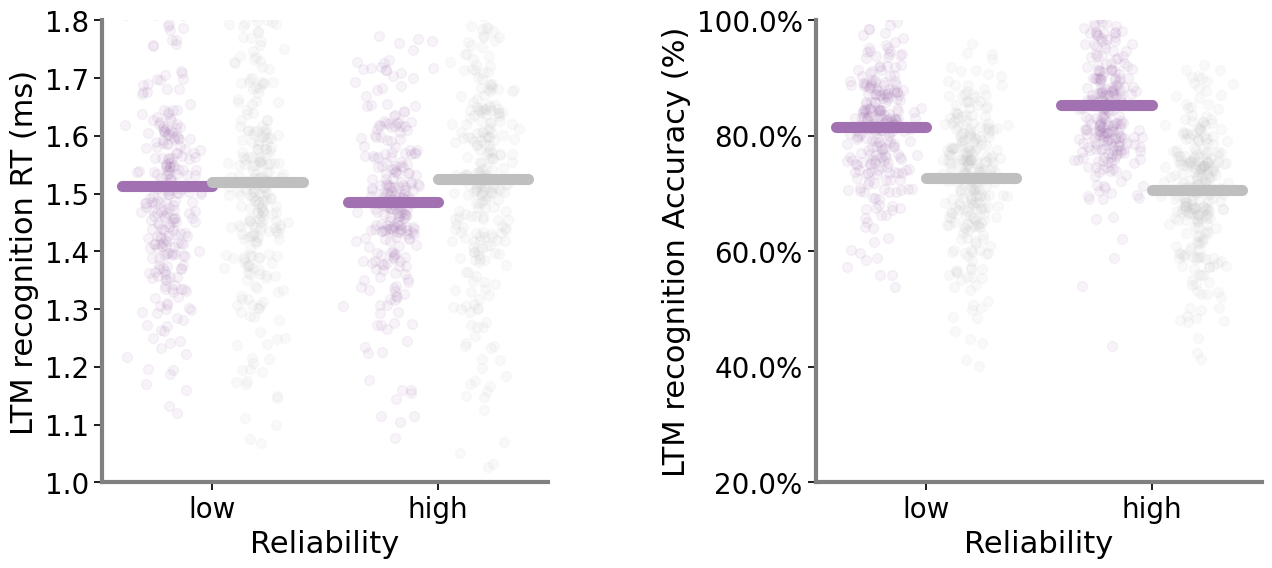

In [28]:
# Custom formatter for percentages without leading zeros
def percent_no_leading_zero(x, pos):
    """Format percentages to remove leading zeros (e.g., 0.2 -> .2%)"""
    pct = x * 100
    if pct == 0:
        return '0%'
    elif 0 < pct < 1:
        return f'{pct:.1f}%'[1:]  # Remove the '0' from '0.2%' to get '.2%'
    elif -1 < pct < 0:
        return f'-{abs(pct):.1f}%'[1:]  # Handle negative values
    else:
        return f'{pct:.1f}%'

# Import required for custom formatter
from matplotlib.ticker import FuncFormatter
import numpy as np
import matplotlib.pyplot as plt

# Create figure with two subplots - proportionally sized to match 3-subplot template
f, axes = plt.subplots(1, 2, figsize=(16, 6))  # Proportional to template's (24, 6)

# Define parameters
dx = 'Reliability'
dhue = 'Attend'
dy_variables = ['LTM RT', 'LTM Accuracy']  
data_sources = [avg_scores_table_rt_wmltm, avg_scores_table_wmltm]
y_labels = ['LTM recognition RT (ms)', 'LTM recognition Accuracy (%)']
desired_order = ['low', 'high']
unique_x = desired_order

# Get unique hue values
unique_hue = sorted(data_sources[0][dhue].unique())

# Define color palette (using predefined purple and other colors)
color_palette = [purple, grey] if len(unique_hue) == 2 else [purple] * len(unique_hue)
spacing = 0.5  # Match template spacing
hue_offset = 0.2  # Match template hue offset

# Create each subplot
for subplot_idx, ax in enumerate(axes):
    
    # Get the y-variable and data for this subplot
    dy = dy_variables[subplot_idx]
    current_data = data_sources[subplot_idx]
    
    # Plot data for current subplot
    for i, x_val in enumerate(unique_x):
        for j, hue_val in enumerate(unique_hue):
            # Filter data for this combination
            subset = current_data[(current_data[dx] == x_val) & 
                                 (current_data[dhue] == hue_val)]
            
            if len(subset) > 0:
                # Calculate x position with spacing - match template
                x_pos = i * spacing + (j - len(unique_hue)/2 + 0.5) * hue_offset
                
                # Add jittered scatter points - match template parameters
                x_jitter = np.random.normal(x_pos, 0.03, len(subset))
                ax.scatter(x_jitter, subset[dy], 
                          color=color_palette[j], alpha=0.08, s=50, zorder=1)
                
                # Calculate and plot mean line - match template
                mean_value = subset[dy].mean()
                ax.plot([x_pos - 0.1, x_pos + 0.1], [mean_value, mean_value], 
                       color=color_palette[j], linewidth=8, solid_capstyle='round', zorder=10)
    
    # Set x-axis - match template font sizes
    ax.set_xticks([i * spacing for i in range(len(unique_x))])
    ax.set_xticklabels(unique_x, fontsize=20)  # Match template
    ax.set_xlabel(dx, fontsize=22)  # Match template
    
    # Set y-axis - match template font sizes
    ax.set_ylabel(y_labels[subplot_idx], fontsize=22)  # Match template
    ax.tick_params(axis='both', which='major', labelsize=20)  # Match template
    
    # Set y-axis ranges and formatting
    if subplot_idx == 0:  # First subplot (LTM RT)
        ax.set_ylim(1, 1.8)
    elif subplot_idx == 1:  # Second subplot (LTM Accuracy)
        ax.set_ylim(0.2, 1.0)
        ax.set_yticks(np.arange(0.2, 1.2, 0.2))  # 20% step sizes (0%, 20%, 40%, 60%, 80%, 100%)
        # Apply custom percentage formatter without leading zeros
        ax.yaxis.set_major_formatter(FuncFormatter(percent_no_leading_zero))
    
    # Match template spine styling
    ax.spines['bottom'].set_color('grey')
    ax.spines['left'].set_color('grey')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.spines['bottom'].set_linewidth(3)  # Match template
    ax.spines['left'].set_linewidth(3)    # Match template

# Match template layout parameters
plt.subplots_adjust(wspace=0.6, right=0.85)
plt.show()

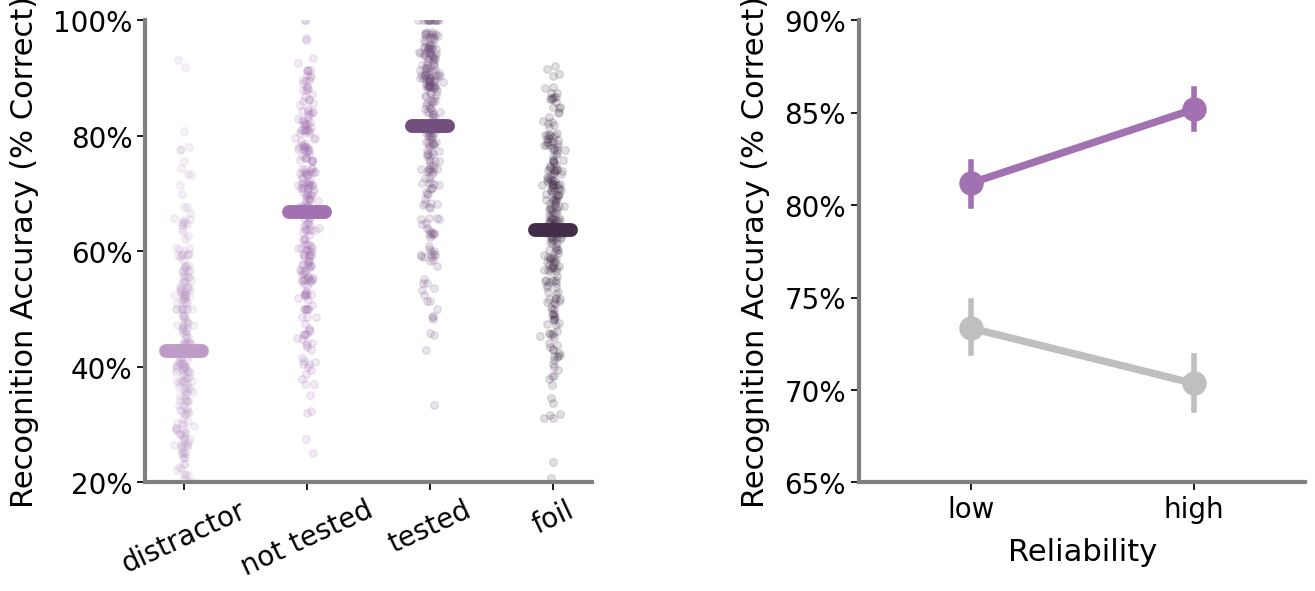

In [29]:
import matplotlib.ticker as mticker

fontsize_labels = 22  
fontsize_ticks = 20   
fontsize_title = 16
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1]})
dx = 'Categories'
dy = 'LTM Accuracy'
desired_order = ['distractor', 'not tested', 'tested', 'foil']
unique_x = desired_order

# Use gradient colors instead of single purple
gradient_colors = create_purple_gradient('#a271b1', 4)
colors = gradient_colors

category_spacing = 1.5
for i, x_val in enumerate(unique_x):
    subset = avg_scores_table[avg_scores_table[dx] == x_val]
    
    if len(subset) > 0:
        x_pos = i * category_spacing
        
        x_jitter = np.random.normal(x_pos, 0.05, len(subset))
        ax1.scatter(x_jitter, subset[dy],  
                   color=colors[i], alpha=0.15, s=30, zorder=1)
        
        mean_value = subset[dy].mean()  
        line_width = 0.22
        ax1.plot([x_pos - line_width, x_pos + line_width], [mean_value, mean_value], 
                color=colors[i], linewidth=10, solid_capstyle='round', zorder=10)

ax1.set_xticks([i * category_spacing for i in range(len(unique_x))])
ax1.set_xticklabels(unique_x, fontsize=fontsize_ticks, rotation=25)
ax1.set_xlabel('', fontsize=fontsize_labels)
ax1.set_ylabel('Recognition Accuracy (% Correct)', fontsize=fontsize_labels, labelpad=10)
ax1.set_ylim(0.2, 1)
ax1.yaxis.set_major_locator(mticker.MultipleLocator(0.2))
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1.0, decimals=0))
ax1.tick_params(axis='y', labelsize=fontsize_ticks)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('grey')
ax1.spines['bottom'].set_color('grey')
ax1.spines['left'].set_linewidth(3)    
ax1.spines['bottom'].set_linewidth(3)
ax1.legend().set_visible(False) if ax1.get_legend() else None  

custom_palette = {'attended': purple, 'not attended': grey}
sns.pointplot(
    x='Reliability',  
    y='recall_answ',  
    hue='Attend',     
    ci=95,
    data=df_correct,  
    scale=2,
    ax=ax2,
    palette=custom_palette,
    linewidth=2,
    errwidth=4,
    legend=False
)
ax2.set_xlabel('Reliability', fontsize=fontsize_labels, labelpad=10)
ax2.set_ylabel('Recognition Accuracy (% Correct)', fontsize=fontsize_labels, labelpad=10)
ax2.tick_params(axis='both', labelsize=fontsize_ticks)
ax2.set_ylim(0.65, 0.9)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1.0, decimals=0))
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('grey')
ax2.spines['bottom'].set_color('grey')
ax2.spines['left'].set_linewidth(3)    
ax2.spines['bottom'].set_linewidth(3) 
ax2.legend().set_visible(False) if ax2.get_legend() else None

# Match spine linewidth setting from reference
for ax in [ax1, ax2]:
    ax.spines['bottom'].set_linewidth(3)  
    ax.spines['left'].set_linewidth(3)

plt.subplots_adjust(wspace=0.6, right=0.85) 
plt.show()

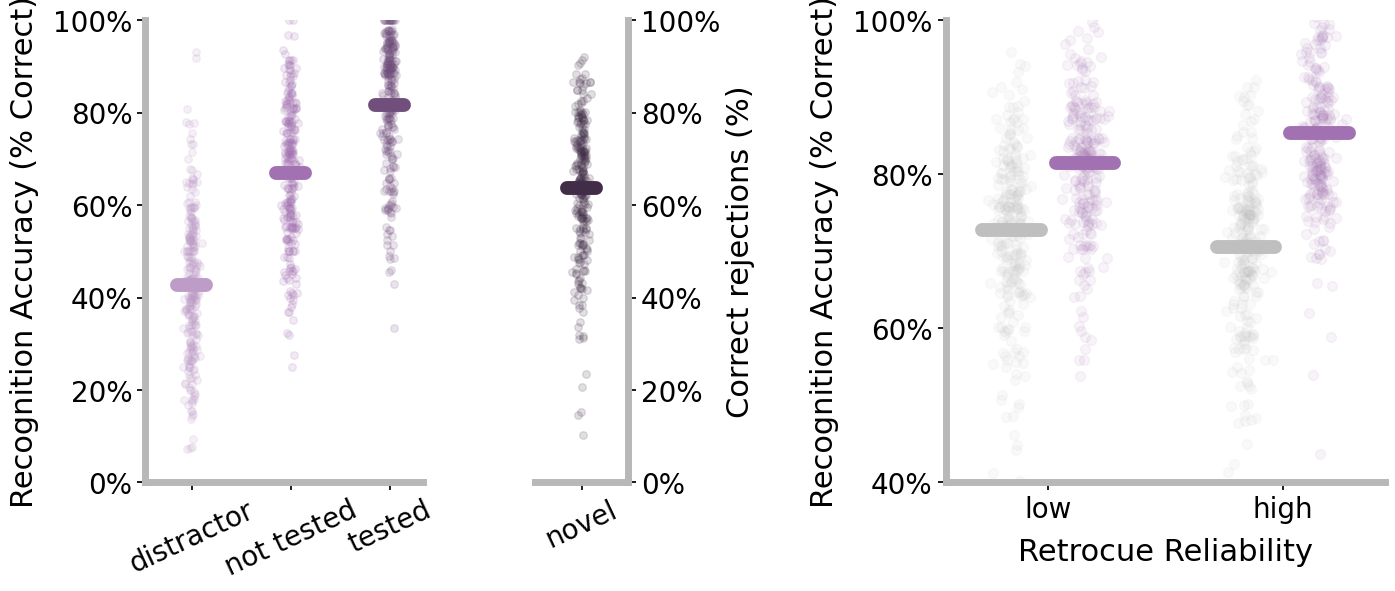

In [30]:
def percent_no_leading_zero(x, pos):
    pct = x * 100
    if pct == 0:
        return '0%'
    elif 0 < pct < 1:
        return f'{pct:.0f}%'[1:] if pct >= 0.5 else f'{pct:.1f}%'[1:]  
    elif -1 < pct < 0:
        return f'-{abs(pct):.0f}%'[1:] if abs(pct) >= 0.5 else f'-{abs(pct):.1f}%'[1:]
    else:
        return f'{pct:.0f}%' 

avg_scores_table[dx] = avg_scores_table[dx].replace('foil', 'novel')

fontsize_labels = 22  
fontsize_ticks = 20   
fontsize_title = 16

# Create 3 subplots with custom spacing: main categories, novel, reliability
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(1, 4, width_ratios=[0.63, 0.21, 0.21, 1], wspace=0.5)
ax1 = fig.add_subplot(gs[0, 0])
ax_novel = fig.add_subplot(gs[0, 1]) 
ax2 = fig.add_subplot(gs[0, 3])

dx = 'Categories'
dy = 'LTM Accuracy'

# First subplot - main categories (excluding novel)
desired_order_main = ['distractor', 'not tested', 'tested']
unique_x_main = desired_order_main

# Use gradient colors for main categories (first 3 colors)
gradient_colors = create_purple_gradient('#a271b1', 4)
colors_main = gradient_colors[:3]

category_spacing = 1.5
for i, x_val in enumerate(unique_x_main):
    subset = avg_scores_table[avg_scores_table[dx] == x_val]
    
    if len(subset) > 0:
        x_pos = i * category_spacing
        
        x_jitter = np.random.normal(x_pos, 0.05, len(subset))
        ax1.scatter(x_jitter, subset[dy],  
                   color=colors_main[i], alpha=0.15, s=30, zorder=1)
        
        mean_value = subset[dy].mean()  
        line_width = 0.22
        ax1.plot([x_pos - line_width, x_pos + line_width], [mean_value, mean_value], 
                color=colors_main[i], linewidth=10, solid_capstyle='round', zorder=10)

ax1.set_xlim(-0.7, (len(unique_x_main) - 1) * category_spacing + 0.5)
ax1.set_xticks([i * category_spacing for i in range(len(unique_x_main))])
ax1.set_xticklabels(unique_x_main, fontsize=fontsize_ticks, rotation=25)
ax1.set_xlabel('', fontsize=fontsize_labels)
ax1.set_ylabel('Recognition Accuracy (% Correct)', fontsize=fontsize_labels, labelpad=10)
ax1.set_ylim(0, 1)
ax1.yaxis.set_major_locator(mticker.MultipleLocator(0.2))
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1.0, decimals=0))
ax1.tick_params(axis='y', labelsize=fontsize_ticks)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('#B8B8B8')
ax1.spines['bottom'].set_color('#B8B8B8')
ax1.spines['left'].set_linewidth(5)    
ax1.spines['bottom'].set_linewidth(5)
ax1.legend().set_visible(False) if ax1.get_legend() else None  

# Novel subplot - just the novel category
subset_novel = avg_scores_table[avg_scores_table[dx] == 'novel']
if len(subset_novel) > 0:
    x_pos = 0
    x_jitter = np.random.normal(x_pos, 0.05, len(subset_novel))
    ax_novel.scatter(x_jitter, subset_novel[dy],  
                    color=gradient_colors[3], alpha=0.15, s=30, zorder=1)
    
    mean_value = subset_novel[dy].mean()  
    line_width = 0.22
    ax_novel.plot([x_pos - line_width, x_pos + line_width], [mean_value, mean_value], 
                 color=gradient_colors[3], linewidth=10, solid_capstyle='round', zorder=10)

ax_novel.set_xlim(-0.7, 0.7)  # Added more buffer space on the left
ax_novel.set_xticks([0])
ax_novel.set_xticklabels(['novel'], fontsize=fontsize_ticks, rotation=25)
ax_novel.set_xlabel('', fontsize=fontsize_labels)
ax_novel.set_ylabel('Correct rejections (%)', fontsize=fontsize_labels)  # Added y-axis label
ax_novel.set_ylim(0, 1)
ax_novel.yaxis.set_major_locator(mticker.MultipleLocator(0.2))
ax_novel.yaxis.set_major_formatter(mticker.PercentFormatter(1.0, decimals=0))

# Move y-axis to the right for novel subplot
ax_novel.yaxis.tick_right()
ax_novel.yaxis.set_label_position("right")
ax_novel.tick_params(axis='y', labelsize=fontsize_ticks)

# Style the novel subplot
ax_novel.spines['top'].set_visible(False)
ax_novel.spines['left'].set_visible(False)
ax_novel.spines['right'].set_color('#B8B8B8')
ax_novel.spines['bottom'].set_color('#B8B8B8')
ax_novel.spines['right'].set_linewidth(5)    
ax_novel.spines['bottom'].set_linewidth(5)

# Third subplot - raincloud plot matching the new style (unchanged)
dx2 = 'Reliability'
dhue2 = 'Attend'
dy2 = 'LTM Accuracy'
data_source2 = avg_scores_table_wmltm
desired_order2 = ['low', 'high']
unique_x2 = desired_order2

# Get unique hue values
unique_hue2 = ['not attended', 'attended']
# Define color palette 
color_palette2 = [grey, purple] if len(unique_hue2) == 2 else [purple] * len(unique_hue2)

spacing2 = 0.8
hue_offset2 = 0.25

# Plot data for third subplot
for i, x_val in enumerate(unique_x2):
    for j, hue_val in enumerate(unique_hue2):
        # Filter data for this combination
        subset = data_source2[(data_source2[dx2] == x_val) & 
                             (data_source2[dhue2] == hue_val)]
        
        if len(subset) > 0:
            # Calculate x position with spacing
            x_pos = i * spacing2 + (j - len(unique_hue2)/2 + 0.5) * hue_offset2
            
            # Add jittered scatter points
            x_jitter = np.random.normal(x_pos, 0.03, len(subset))
            ax2.scatter(x_jitter, subset[dy2], 
                      color=color_palette2[j], alpha=0.08, s=50, zorder=1)
            
            # Calculate and plot mean line
            mean_value = subset[dy2].mean()
            ax2.plot([x_pos - 0.1, x_pos + 0.1], [mean_value, mean_value], 
                   color=color_palette2[j], linewidth=10, solid_capstyle='round', zorder=10)

# Set x-axis for third subplot
ax2.set_xlim(-0.35, (len(unique_x2) - 1) * spacing2 + 0.35)
ax2.set_xticks([i * spacing2 for i in range(len(unique_x2))])
ax2.set_xticklabels(unique_x2, fontsize=fontsize_ticks)
ax2.set_xlabel(dx2, fontsize=fontsize_labels, labelpad=10)

# Set y-axis for third subplot
ax2.set_ylabel('Recognition Accuracy (% Correct)', fontsize=fontsize_labels, labelpad=10)
ax2.set_xlabel('Retrocue Reliability', fontsize=fontsize_labels, labelpad=10)

ax2.tick_params(axis='both', labelsize=fontsize_ticks)
ax2.set_ylim(0.4, 1.0)
ax2.set_yticks(np.arange(0.4, 1.2, 0.2))
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1.0, decimals=0))

# Spine styling for third subplot
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('#B8B8B8')
ax2.spines['bottom'].set_color('#B8B8B8')
ax2.spines['left'].set_linewidth(5)    
ax2.spines['bottom'].set_linewidth(5) 
ax2.legend().set_visible(False) if ax2.get_legend() else None

# Match spine linewidth setting for all axes
for ax in [ax1, ax_novel, ax2]:
    ax.spines['bottom'].set_linewidth(5)  
    if ax == ax_novel:
        ax.spines['right'].set_linewidth(5)
    else:
        ax.spines['left'].set_linewidth(5)

plt.show()

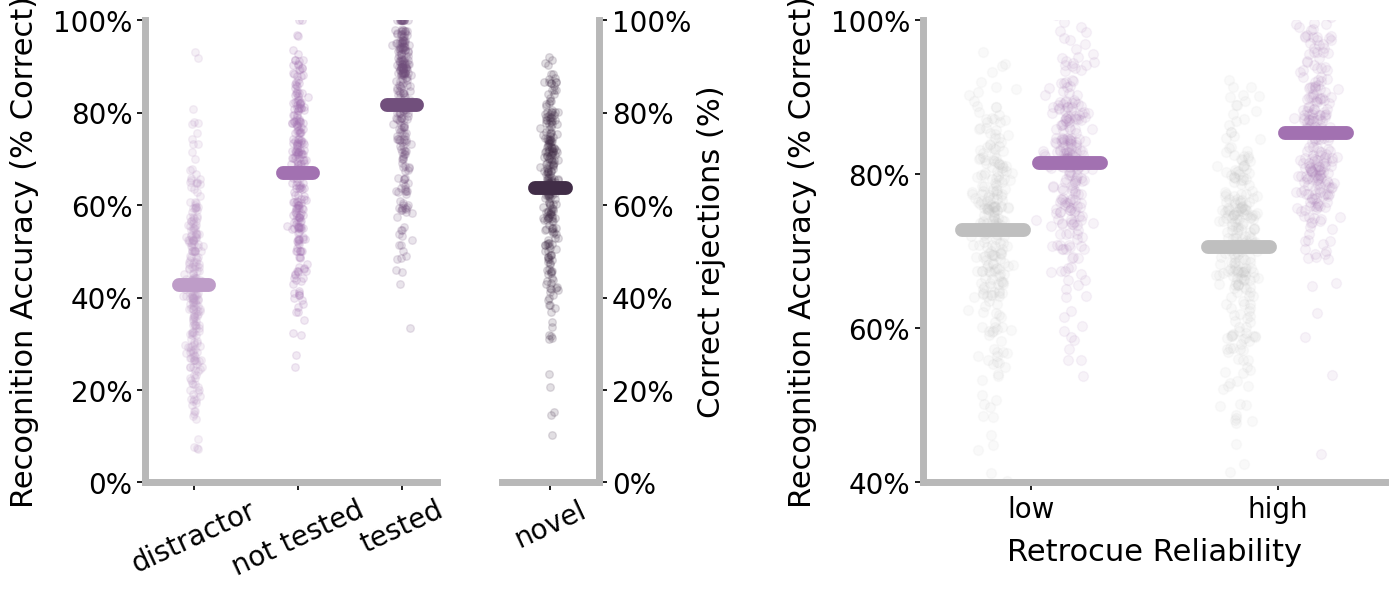

In [31]:
def percent_no_leading_zero(x, pos):
    pct = x * 100
    if pct == 0:
        return '0%'
    elif 0 < pct < 1:
        return f'{pct:.0f}%'[1:] if pct >= 0.5 else f'{pct:.1f}%'[1:]  
    elif -1 < pct < 0:
        return f'-{abs(pct):.0f}%'[1:] if abs(pct) >= 0.5 else f'-{abs(pct):.1f}%'[1:]
    else:
        return f'{pct:.0f}%' 

avg_scores_table[dx] = avg_scores_table[dx].replace('foil', 'novel')

fontsize_labels = 22  
fontsize_ticks = 20   
fontsize_title = 16

# Create 3 subplots with custom spacing: main categories, novel, reliability
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(16, 6))
# Reduced wspace from 0.5 to 0.25 and increased spacer column from 0.21 to 0.42
gs = gridspec.GridSpec(1, 4, width_ratios=[0.63, 0.21, 0.42, 1], wspace=0.25)
ax1 = fig.add_subplot(gs[0, 0])
ax_novel = fig.add_subplot(gs[0, 1]) 
ax2 = fig.add_subplot(gs[0, 3])

dx = 'Categories'
dy = 'LTM Accuracy'

# First subplot - main categories (excluding novel)
desired_order_main = ['distractor', 'not tested', 'tested']
unique_x_main = desired_order_main

# Use gradient colors for main categories (first 3 colors)
gradient_colors = create_purple_gradient('#a271b1', 4)
colors_main = gradient_colors[:3]

category_spacing = 1.5
for i, x_val in enumerate(unique_x_main):
    subset = avg_scores_table[avg_scores_table[dx] == x_val]
    
    if len(subset) > 0:
        x_pos = i * category_spacing
        
        x_jitter = np.random.normal(x_pos, 0.05, len(subset))
        ax1.scatter(x_jitter, subset[dy],  
                   color=colors_main[i], alpha=0.15, s=30, zorder=1)
        
        mean_value = subset[dy].mean()  
        line_width = 0.22
        ax1.plot([x_pos - line_width, x_pos + line_width], [mean_value, mean_value], 
                color=colors_main[i], linewidth=10, solid_capstyle='round', zorder=10)

ax1.set_xlim(-0.7, (len(unique_x_main) - 1) * category_spacing + 0.5)
ax1.set_xticks([i * category_spacing for i in range(len(unique_x_main))])
ax1.set_xticklabels(unique_x_main, fontsize=fontsize_ticks, rotation=25)
ax1.set_xlabel('', fontsize=fontsize_labels)
ax1.set_ylabel('Recognition Accuracy (% Correct)', fontsize=fontsize_labels, labelpad=10)
ax1.set_ylim(0, 1)
ax1.yaxis.set_major_locator(mticker.MultipleLocator(0.2))
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1.0, decimals=0))
ax1.tick_params(axis='y', labelsize=fontsize_ticks)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('#B8B8B8')
ax1.spines['bottom'].set_color('#B8B8B8')
ax1.spines['left'].set_linewidth(5)    
ax1.spines['bottom'].set_linewidth(5)
ax1.legend().set_visible(False) if ax1.get_legend() else None  

# Novel subplot - just the novel category
subset_novel = avg_scores_table[avg_scores_table[dx] == 'novel']
if len(subset_novel) > 0:
    x_pos = 0
    x_jitter = np.random.normal(x_pos, 0.05, len(subset_novel))
    ax_novel.scatter(x_jitter, subset_novel[dy],  
                    color=gradient_colors[3], alpha=0.15, s=30, zorder=1)
    
    mean_value = subset_novel[dy].mean()  
    line_width = 0.22
    ax_novel.plot([x_pos - line_width, x_pos + line_width], [mean_value, mean_value], 
                 color=gradient_colors[3], linewidth=10, solid_capstyle='round', zorder=10)

ax_novel.set_xlim(-0.7, 0.7)  # Added more buffer space on the left
ax_novel.set_xticks([0])
ax_novel.set_xticklabels(['novel'], fontsize=fontsize_ticks, rotation=25)
ax_novel.set_xlabel('', fontsize=fontsize_labels)
ax_novel.set_ylabel('Correct rejections (%)', fontsize=fontsize_labels)  # Added y-axis label
ax_novel.set_ylim(0, 1)
ax_novel.yaxis.set_major_locator(mticker.MultipleLocator(0.2))
ax_novel.yaxis.set_major_formatter(mticker.PercentFormatter(1.0, decimals=0))

# Move y-axis to the right for novel subplot
ax_novel.yaxis.tick_right()
ax_novel.yaxis.set_label_position("right")
ax_novel.tick_params(axis='y', labelsize=fontsize_ticks)

# Style the novel subplot
ax_novel.spines['top'].set_visible(False)
ax_novel.spines['left'].set_visible(False)
ax_novel.spines['right'].set_color('#B8B8B8')
ax_novel.spines['bottom'].set_color('#B8B8B8')
ax_novel.spines['right'].set_linewidth(5)    
ax_novel.spines['bottom'].set_linewidth(5)

# Third subplot - raincloud plot matching the new style (unchanged)
dx2 = 'Reliability'
dhue2 = 'Attend'
dy2 = 'LTM Accuracy'
data_source2 = avg_scores_table_wmltm
desired_order2 = ['low', 'high']
unique_x2 = desired_order2

# Get unique hue values
unique_hue2 = ['not attended', 'attended']
# Define color palette 
color_palette2 = [grey, purple] if len(unique_hue2) == 2 else [purple] * len(unique_hue2)

spacing2 = 0.8
hue_offset2 = 0.25

# Plot data for third subplot
for i, x_val in enumerate(unique_x2):
    for j, hue_val in enumerate(unique_hue2):
        # Filter data for this combination
        subset = data_source2[(data_source2[dx2] == x_val) & 
                             (data_source2[dhue2] == hue_val)]
        
        if len(subset) > 0:
            # Calculate x position with spacing
            x_pos = i * spacing2 + (j - len(unique_hue2)/2 + 0.5) * hue_offset2
            
            # Add jittered scatter points
            x_jitter = np.random.normal(x_pos, 0.03, len(subset))
            ax2.scatter(x_jitter, subset[dy2], 
                      color=color_palette2[j], alpha=0.08, s=50, zorder=1)
            
            # Calculate and plot mean line
            mean_value = subset[dy2].mean()
            ax2.plot([x_pos - 0.1, x_pos + 0.1], [mean_value, mean_value], 
                   color=color_palette2[j], linewidth=10, solid_capstyle='round', zorder=10)

# Set x-axis for third subplot
ax2.set_xlim(-0.35, (len(unique_x2) - 1) * spacing2 + 0.35)
ax2.set_xticks([i * spacing2 for i in range(len(unique_x2))])
ax2.set_xticklabels(unique_x2, fontsize=fontsize_ticks)
ax2.set_xlabel(dx2, fontsize=fontsize_labels, labelpad=10)

# Set y-axis for third subplot
ax2.set_ylabel('Recognition Accuracy (% Correct)', fontsize=fontsize_labels, labelpad=10)
ax2.set_xlabel('Retrocue Reliability', fontsize=fontsize_labels, labelpad=10)

ax2.tick_params(axis='both', labelsize=fontsize_ticks)
ax2.set_ylim(0.4, 1.0)
ax2.set_yticks(np.arange(0.4, 1.2, 0.2))
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1.0, decimals=0))

# Spine styling for third subplot
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('#B8B8B8')
ax2.spines['bottom'].set_color('#B8B8B8')
ax2.spines['left'].set_linewidth(5)    
ax2.spines['bottom'].set_linewidth(5) 
ax2.legend().set_visible(False) if ax2.get_legend() else None

# Match spine linewidth setting for all axes
for ax in [ax1, ax_novel, ax2]:
    ax.spines['bottom'].set_linewidth(5)  
    if ax == ax_novel:
        ax.spines['right'].set_linewidth(5)
    else:
        ax.spines['left'].set_linewidth(5)

plt.show()

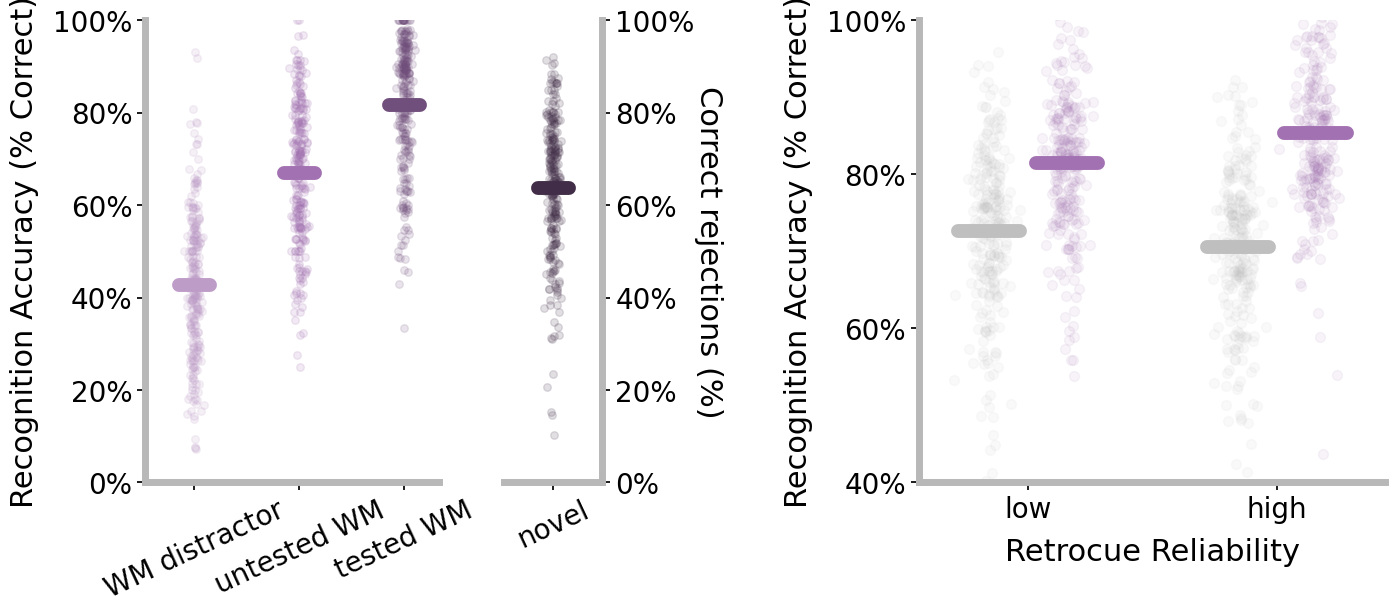

In [43]:
def percent_no_leading_zero(x, pos):
    pct = x * 100
    if pct == 0:
        return '0%'
    elif 0 < pct < 1:
        return f'{pct:.0f}%'[1:] if pct >= 0.5 else f'{pct:.1f}%'[1:]  
    elif -1 < pct < 0:
        return f'-{abs(pct):.0f}%'[1:] if abs(pct) >= 0.5 else f'-{abs(pct):.1f}%'[1:]
    else:
        return f'{pct:.0f}%' 

avg_scores_table[dx] = avg_scores_table[dx].replace('foil', 'novel')

fontsize_labels = 22  
fontsize_ticks = 20   
fontsize_title = 16

# Create 3 subplots with custom spacing: main categories, novel, reliability
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(16, 6))
# Adjusted width ratios for precise spacing control:
# - Reduced spacing between first and second plots by reducing wspace to 0.15
# - Increased spacer column from 0.42 to 0.65 for more space between second and third plots
gs = gridspec.GridSpec(1, 4, width_ratios=[0.63, 0.21, 0.4, 1], wspace=0.25)
ax1 = fig.add_subplot(gs[0, 0])
ax_novel = fig.add_subplot(gs[0, 1]) 
ax2 = fig.add_subplot(gs[0, 3])

dx = 'Categories'
dy = 'LTM Accuracy'

# First subplot - main categories (excluding novel)
# Updated labels as requested
desired_order_main = ['distractor', 'not tested', 'tested']
label_mapping = {
    'distractor': 'WM distractor',
    'not tested': 'untested WM', 
    'tested': 'tested WM'
}
unique_x_main = desired_order_main

# Use gradient colors for main categories (first 3 colors)
gradient_colors = create_purple_gradient('#a271b1', 4)
colors_main = gradient_colors[:3]

category_spacing = 1.5
for i, x_val in enumerate(unique_x_main):
    subset = avg_scores_table[avg_scores_table[dx] == x_val]
    
    if len(subset) > 0:
        x_pos = i * category_spacing
        
        x_jitter = np.random.normal(x_pos, 0.05, len(subset))
        ax1.scatter(x_jitter, subset[dy],  
                   color=colors_main[i], alpha=0.15, s=30, zorder=1)
        
        mean_value = subset[dy].mean()  
        line_width = 0.22
        ax1.plot([x_pos - line_width, x_pos + line_width], [mean_value, mean_value], 
                color=colors_main[i], linewidth=10, solid_capstyle='round', zorder=10)

ax1.set_xlim(-0.7, (len(unique_x_main) - 1) * category_spacing + 0.5)
ax1.set_xticks([i * category_spacing for i in range(len(unique_x_main))])
# Apply the label mapping
ax1.set_xticklabels([label_mapping[label] for label in unique_x_main], fontsize=fontsize_ticks, rotation=25)
ax1.set_xlabel('', fontsize=fontsize_labels)
ax1.set_ylabel('Recognition Accuracy (% Correct)', fontsize=fontsize_labels, labelpad=10)
ax1.set_ylim(0, 1)
ax1.yaxis.set_major_locator(mticker.MultipleLocator(0.2))
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1.0, decimals=0))
ax1.tick_params(axis='y', labelsize=fontsize_ticks)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('#B8B8B8')
ax1.spines['bottom'].set_color('#B8B8B8')
ax1.spines['left'].set_linewidth(5)    
ax1.spines['bottom'].set_linewidth(5)
ax1.legend().set_visible(False) if ax1.get_legend() else None  

# Novel subplot - just the novel category
subset_novel = avg_scores_table[avg_scores_table[dx] == 'novel']
if len(subset_novel) > 0:
    x_pos = 0
    x_jitter = np.random.normal(x_pos, 0.05, len(subset_novel))
    ax_novel.scatter(x_jitter, subset_novel[dy],  
                    color=gradient_colors[3], alpha=0.15, s=30, zorder=1)
    
    mean_value = subset_novel[dy].mean()  
    line_width = 0.22
    ax_novel.plot([x_pos - line_width, x_pos + line_width], [mean_value, mean_value], 
                 color=gradient_colors[3], linewidth=10, solid_capstyle='round', zorder=10)

ax_novel.set_xlim(-0.7, 0.7)  # Added more buffer space on the left
ax_novel.set_xticks([0])
ax_novel.set_xticklabels(['novel'], fontsize=fontsize_ticks, rotation=25)
ax_novel.set_xlabel('', fontsize=fontsize_labels)
# Rotated label to face inward (270 degrees = facing left/inward)
ax_novel.set_ylabel('Correct rejections (%)', fontsize=fontsize_labels, rotation=270, labelpad=20)
ax_novel.set_ylim(0, 1)
ax_novel.yaxis.set_major_locator(mticker.MultipleLocator(0.2))
ax_novel.yaxis.set_major_formatter(mticker.PercentFormatter(1.0, decimals=0))

# Move y-axis to the right for novel subplot
ax_novel.yaxis.tick_right()
ax_novel.yaxis.set_label_position("right")
ax_novel.tick_params(axis='y', labelsize=fontsize_ticks)

# Style the novel subplot
ax_novel.spines['top'].set_visible(False)
ax_novel.spines['left'].set_visible(False)
ax_novel.spines['right'].set_color('#B8B8B8')
ax_novel.spines['bottom'].set_color('#B8B8B8')
ax_novel.spines['right'].set_linewidth(5)    
ax_novel.spines['bottom'].set_linewidth(5)

# Third subplot - raincloud plot matching the new style (unchanged)
dx2 = 'Reliability'
dhue2 = 'Attend'
dy2 = 'LTM Accuracy'
data_source2 = avg_scores_table_wmltm
desired_order2 = ['low', 'high']
unique_x2 = desired_order2

# Get unique hue values
unique_hue2 = ['not attended', 'attended']
# Define color palette 
color_palette2 = [grey, purple] if len(unique_hue2) == 2 else [purple] * len(unique_hue2)

spacing2 = 0.8
hue_offset2 = 0.25

# Plot data for third subplot
for i, x_val in enumerate(unique_x2):
    for j, hue_val in enumerate(unique_hue2):
        # Filter data for this combination
        subset = data_source2[(data_source2[dx2] == x_val) & 
                             (data_source2[dhue2] == hue_val)]
        
        if len(subset) > 0:
            # Calculate x position with spacing
            x_pos = i * spacing2 + (j - len(unique_hue2)/2 + 0.5) * hue_offset2
            
            # Add jittered scatter points
            x_jitter = np.random.normal(x_pos, 0.03, len(subset))
            ax2.scatter(x_jitter, subset[dy2], 
                      color=color_palette2[j], alpha=0.08, s=50, zorder=1)
            
            # Calculate and plot mean line
            mean_value = subset[dy2].mean()
            ax2.plot([x_pos - 0.1, x_pos + 0.1], [mean_value, mean_value], 
                   color=color_palette2[j], linewidth=10, solid_capstyle='round', zorder=10)

# Set x-axis for third subplot
ax2.set_xlim(-0.35, (len(unique_x2) - 1) * spacing2 + 0.35)
ax2.set_xticks([i * spacing2 for i in range(len(unique_x2))])
ax2.set_xticklabels(unique_x2, fontsize=fontsize_ticks)
ax2.set_xlabel(dx2, fontsize=fontsize_labels, labelpad=10)

# Set y-axis for third subplot
ax2.set_ylabel('Recognition Accuracy (% Correct)', fontsize=fontsize_labels, labelpad=10)
ax2.set_xlabel('Retrocue Reliability', fontsize=fontsize_labels, labelpad=10)

ax2.tick_params(axis='both', labelsize=fontsize_ticks)
ax2.set_ylim(0.4, 1.0)
ax2.set_yticks(np.arange(0.4, 1.2, 0.2))
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1.0, decimals=0))

# Spine styling for third subplot
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('#B8B8B8')
ax2.spines['bottom'].set_color('#B8B8B8')
ax2.spines['left'].set_linewidth(5)    
ax2.spines['bottom'].set_linewidth(5) 
ax2.legend().set_visible(False) if ax2.get_legend() else None

# Match spine linewidth setting for all axes
for ax in [ax1, ax_novel, ax2]:
    ax.spines['bottom'].set_linewidth(5)  
    if ax == ax_novel:
        ax.spines['right'].set_linewidth(5)
    else:
        ax.spines['left'].set_linewidth(5)

plt.show()

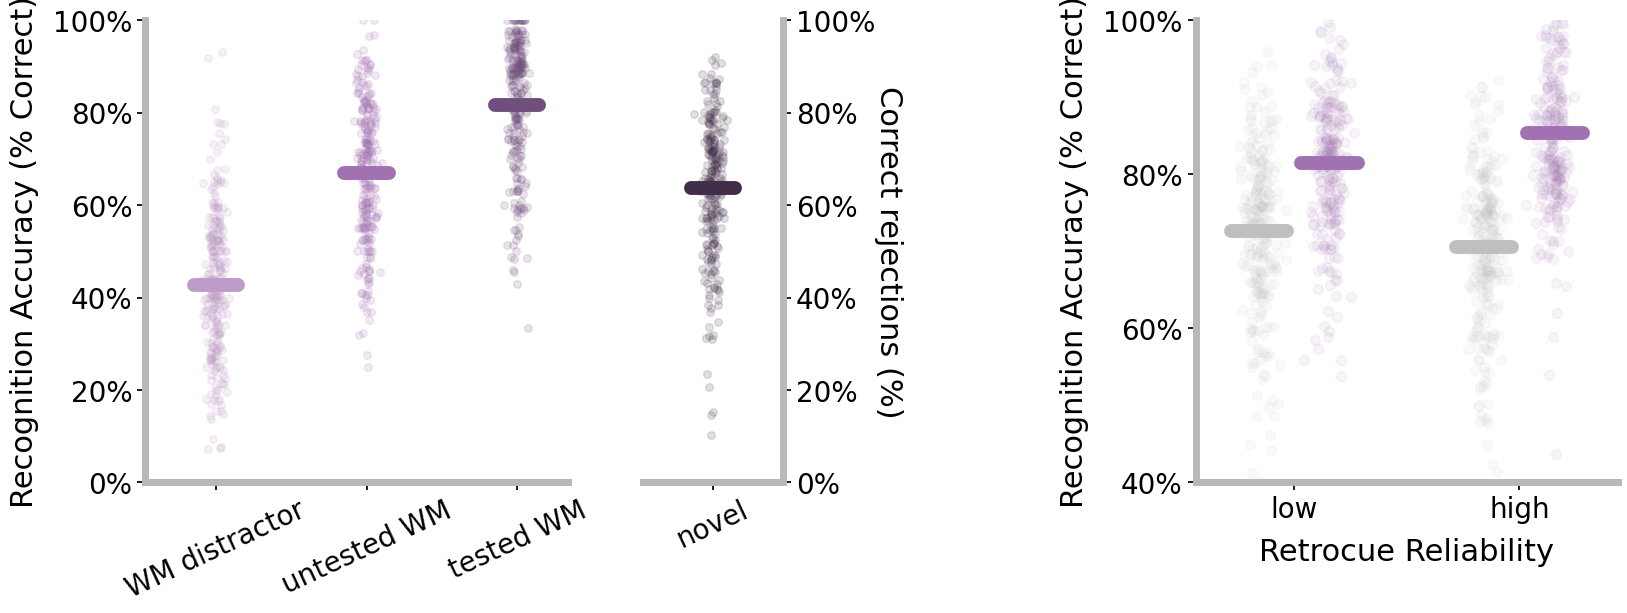

In [51]:
def percent_no_leading_zero(x, pos):
    pct = x * 100
    if pct == 0:
        return '0%'
    elif 0 < pct < 1:
        return f'{pct:.0f}%'[1:] if pct >= 0.5 else f'{pct:.1f}%'[1:]  
    elif -1 < pct < 0:
        return f'-{abs(pct):.0f}%'[1:] if abs(pct) >= 0.5 else f'-{abs(pct):.1f}%'[1:]
    else:
        return f'{pct:.0f}%' 

avg_scores_table[dx] = avg_scores_table[dx].replace('foil', 'novel')

fontsize_labels = 22  
fontsize_ticks = 20   
fontsize_title = 16

# Create 5 subplots with custom spacing: main categories, spacer, novel, spacer, reliability
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(19, 6))
# New layout with dedicated spacer between first and second plots:
# - Column 0: first plot (wider - 1.0)
# - Column 1: spacer between first and second (0.25) 
# - Column 2: second plot (novel - 0.21)
# - Column 3: spacer between second and third (0.65 - same as before)
# - Column 4: third plot (1.0 - same ratio to preserve size)
gs = gridspec.GridSpec(1, 5, width_ratios=[1.0, 0.05, 0.33, 0.85, 1.0], wspace=0.1)
ax1 = fig.add_subplot(gs[0, 0])
ax_novel = fig.add_subplot(gs[0, 2]) 
ax2 = fig.add_subplot(gs[0, 4])

dx = 'Categories'
dy = 'LTM Accuracy'

# First subplot - main categories (excluding novel)
# Updated labels as requested
desired_order_main = ['distractor', 'not tested', 'tested']
label_mapping = {
    'distractor': 'WM distractor',
    'not tested': 'untested WM', 
    'tested': 'tested WM'
}
unique_x_main = desired_order_main

# Use gradient colors for main categories (first 3 colors)
gradient_colors = create_purple_gradient('#a271b1', 4)
colors_main = gradient_colors[:3]

category_spacing = 1.5
for i, x_val in enumerate(unique_x_main):
    subset = avg_scores_table[avg_scores_table[dx] == x_val]
    
    if len(subset) > 0:
        x_pos = i * category_spacing
        
        x_jitter = np.random.normal(x_pos, 0.05, len(subset))
        ax1.scatter(x_jitter, subset[dy],  
                   color=colors_main[i], alpha=0.15, s=30, zorder=1)
        
        mean_value = subset[dy].mean()  
        line_width = 0.22
        ax1.plot([x_pos - line_width, x_pos + line_width], [mean_value, mean_value], 
                color=colors_main[i], linewidth=10, solid_capstyle='round', zorder=10)

ax1.set_xlim(-0.7, (len(unique_x_main) - 1) * category_spacing + 0.5)
ax1.set_xticks([i * category_spacing for i in range(len(unique_x_main))])
# Apply the label mapping
ax1.set_xticklabels([label_mapping[label] for label in unique_x_main], fontsize=fontsize_ticks, rotation=25)
ax1.set_xlabel('', fontsize=fontsize_labels)
ax1.set_ylabel('Recognition Accuracy (% Correct)', fontsize=fontsize_labels, labelpad=10)
ax1.set_ylim(0, 1)
ax1.yaxis.set_major_locator(mticker.MultipleLocator(0.2))
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1.0, decimals=0))
ax1.tick_params(axis='y', labelsize=fontsize_ticks)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('#B8B8B8')
ax1.spines['bottom'].set_color('#B8B8B8')
ax1.spines['left'].set_linewidth(5)    
ax1.spines['bottom'].set_linewidth(5)
ax1.legend().set_visible(False) if ax1.get_legend() else None  

# Novel subplot - just the novel category
subset_novel = avg_scores_table[avg_scores_table[dx] == 'novel']
if len(subset_novel) > 0:
    x_pos = 0
    x_jitter = np.random.normal(x_pos, 0.05, len(subset_novel))
    ax_novel.scatter(x_jitter, subset_novel[dy],  
                    color=gradient_colors[3], alpha=0.15, s=30, zorder=1)
    
    mean_value = subset_novel[dy].mean()  
    line_width = 0.22
    ax_novel.plot([x_pos - line_width, x_pos + line_width], [mean_value, mean_value], 
                 color=gradient_colors[3], linewidth=10, solid_capstyle='round', zorder=10)

ax_novel.set_xlim(-0.7, 0.7)  # Added more buffer space on the left
ax_novel.set_xticks([0])
ax_novel.set_xticklabels(['novel'], fontsize=fontsize_ticks, rotation=25)
ax_novel.set_xlabel('', fontsize=fontsize_labels)
# Rotated label to face inward (270 degrees = facing left/inward)
ax_novel.set_ylabel('Correct rejections (%)', fontsize=fontsize_labels, rotation=270, labelpad=20)
ax_novel.set_ylim(0, 1)
ax_novel.yaxis.set_major_locator(mticker.MultipleLocator(0.2))
ax_novel.yaxis.set_major_formatter(mticker.PercentFormatter(1.0, decimals=0))

# Move y-axis to the right for novel subplot
ax_novel.yaxis.tick_right()
ax_novel.yaxis.set_label_position("right")
ax_novel.tick_params(axis='y', labelsize=fontsize_ticks)

# Style the novel subplot
ax_novel.spines['top'].set_visible(False)
ax_novel.spines['left'].set_visible(False)
ax_novel.spines['right'].set_color('#B8B8B8')
ax_novel.spines['bottom'].set_color('#B8B8B8')
ax_novel.spines['right'].set_linewidth(5)    
ax_novel.spines['bottom'].set_linewidth(5)

# Third subplot - raincloud plot matching the new style (unchanged)
dx2 = 'Reliability'
dhue2 = 'Attend'
dy2 = 'LTM Accuracy'
data_source2 = avg_scores_table_wmltm
desired_order2 = ['low', 'high']
unique_x2 = desired_order2

# Get unique hue values
unique_hue2 = ['not attended', 'attended']
# Define color palette 
color_palette2 = [grey, purple] if len(unique_hue2) == 2 else [purple] * len(unique_hue2)

spacing2 = 0.8
hue_offset2 = 0.25

# Plot data for third subplot
for i, x_val in enumerate(unique_x2):
    for j, hue_val in enumerate(unique_hue2):
        # Filter data for this combination
        subset = data_source2[(data_source2[dx2] == x_val) & 
                             (data_source2[dhue2] == hue_val)]
        
        if len(subset) > 0:
            # Calculate x position with spacing
            x_pos = i * spacing2 + (j - len(unique_hue2)/2 + 0.5) * hue_offset2
            
            # Add jittered scatter points
            x_jitter = np.random.normal(x_pos, 0.03, len(subset))
            ax2.scatter(x_jitter, subset[dy2], 
                      color=color_palette2[j], alpha=0.08, s=50, zorder=1)
            
            # Calculate and plot mean line
            mean_value = subset[dy2].mean()
            ax2.plot([x_pos - 0.1, x_pos + 0.1], [mean_value, mean_value], 
                   color=color_palette2[j], linewidth=10, solid_capstyle='round', zorder=10)

# Set x-axis for third subplot
ax2.set_xlim(-0.35, (len(unique_x2) - 1) * spacing2 + 0.35)
ax2.set_xticks([i * spacing2 for i in range(len(unique_x2))])
ax2.set_xticklabels(unique_x2, fontsize=fontsize_ticks)
ax2.set_xlabel(dx2, fontsize=fontsize_labels, labelpad=10)

# Set y-axis for third subplot
ax2.set_ylabel('Recognition Accuracy (% Correct)', fontsize=fontsize_labels, labelpad=10)
ax2.set_xlabel('Retrocue Reliability', fontsize=fontsize_labels, labelpad=10)

ax2.tick_params(axis='both', labelsize=fontsize_ticks)
ax2.set_ylim(0.4, 1.0)
ax2.set_yticks(np.arange(0.4, 1.2, 0.2))
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1.0, decimals=0))

# Spine styling for third subplot
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('#B8B8B8')
ax2.spines['bottom'].set_color('#B8B8B8')
ax2.spines['left'].set_linewidth(5)    
ax2.spines['bottom'].set_linewidth(5) 
ax2.legend().set_visible(False) if ax2.get_legend() else None

# Match spine linewidth setting for all axes
for ax in [ax1, ax_novel, ax2]:
    ax.spines['bottom'].set_linewidth(5)  
    if ax == ax_novel:
        ax.spines['right'].set_linewidth(5)
    else:
        ax.spines['left'].set_linewidth(5)

plt.show()